In [1]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
data_path = kagglehub.competition_download('playground-series-s5e7')

print('Data source import complete.')

100%|██████████| 191k/191k [00:00<00:00, 61.3MB/s]

Extracting files...
Data source import complete.


In [3]:
print(data_path)

/root/.cache/kagglehub/competitions/playground-series-s5e7


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

Original dataset

In [8]:
df_orig = pd.read_csv('/content/drive/MyDrive/code/kaggle/S5E7_introvert_extrovert/personality_datasert.csv')

In [66]:
df_orig.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [11]:
data = data.drop(columns=['id'])

common_cols = data.columns.intersection(df_orig.columns)

train_aligned = data[common_cols]
df_orig_aligned = df_orig[common_cols]

data = pd.concat([train_aligned, df_orig_aligned], axis=0).reset_index(drop=True)


# EDA

In [12]:
data.shape

(21424, 8)

In [13]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [14]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,20234.000000,20244.000000,19958.000000,20370.000000,20160.000000
mean,3.333837,5.078627,3.892574,7.750746,4.778210
std,3.107410,2.807966,2.118592,4.267569,2.923773
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,4.000000,2.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,5.000000,7.000000,6.000000,11.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           20234 non-null  float64
 1   Stage_fear                 19531 non-null  object 
 2   Social_event_attendance    20244 non-null  float64
 3   Going_outside              19958 non-null  float64
 4   Drained_after_socializing  20275 non-null  object 
 5   Friends_circle_size        20370 non-null  float64
 6   Post_frequency             20160 non-null  float64
 7   Personality                21424 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [16]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

                           Missing Values  Percentage (%)
Stage_fear                           1893            8.84
Going_outside                        1466            6.84
Post_frequency                       1264            5.90
Time_spent_Alone                     1190            5.55
Social_event_attendance              1180            5.51
Drained_after_socializing            1149            5.36
Friends_circle_size                  1054            4.92
Personality                             0            0.00


In [17]:
data.nunique()

,0
Time_spent_Alone,13
Stage_fear,2
Social_event_attendance,12
Going_outside,8
Drained_after_socializing,2
Friends_circle_size,17
Post_frequency,12
Personality,2


In [18]:
print(f"Duplicates before dropping: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Duplicates after dropping: {data.duplicated().sum()}")

Duplicates before dropping: 456
Duplicates after dropping: 0



Check dataset balance

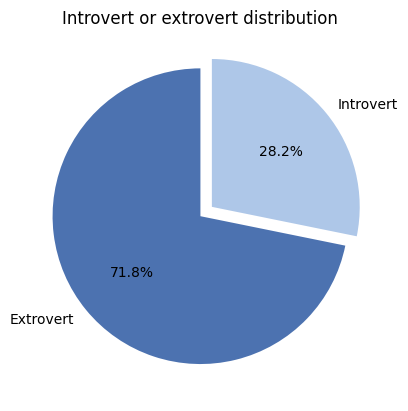

In [19]:
data['Personality'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Introvert or extrovert distribution')
plt.ylabel('')
plt.show()

# Data visualisations

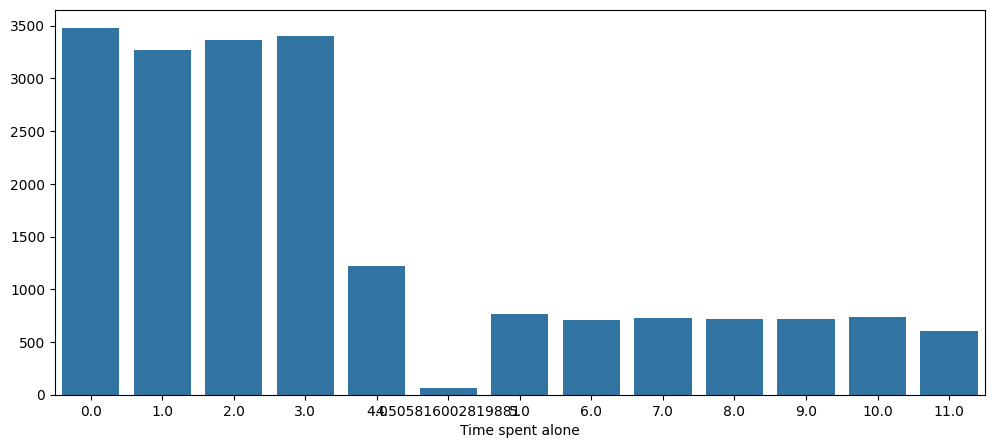

In [76]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Time_spent_Alone")
plt.xlabel('Time spent alone')
plt.ylabel('')
plt.show()

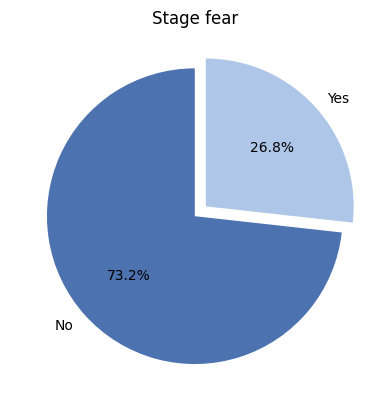

In [21]:
data['Stage_fear'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Stage fear')
plt.ylabel('')
plt.show()

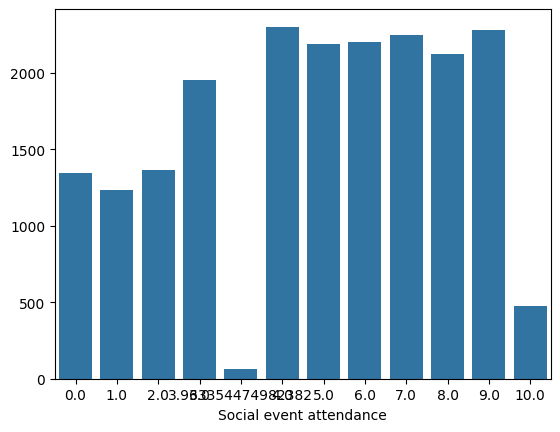

In [22]:
sns.countplot(data=data, x="Social_event_attendance")
plt.xlabel('Social event attendance')
plt.ylabel('')
plt.show()

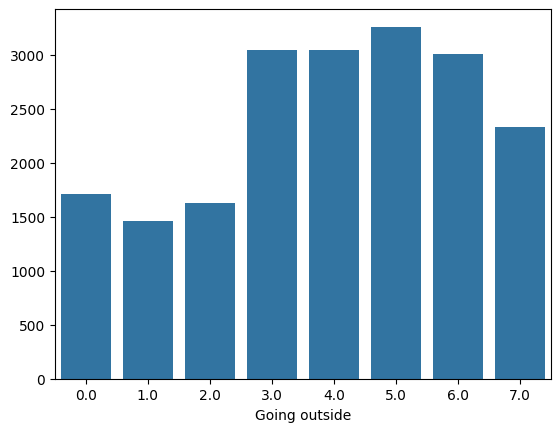

In [23]:
sns.countplot(data=data, x="Going_outside")
plt.xlabel('Going outside')
plt.ylabel('')
plt.show()

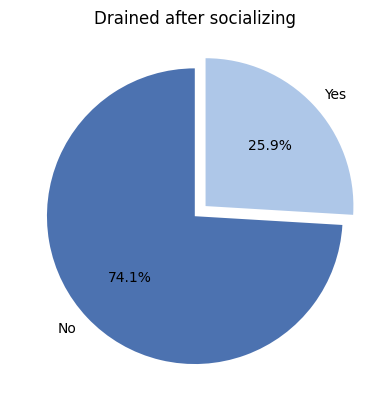

In [24]:
data['Drained_after_socializing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Drained after socializing')
plt.ylabel('')
plt.show()

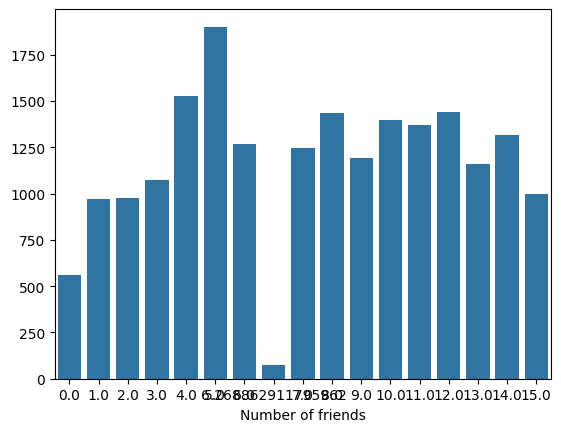

In [25]:
sns.countplot(data=data, x="Friends_circle_size")
plt.xlabel('Number of friends')
plt.ylabel('')
plt.show()

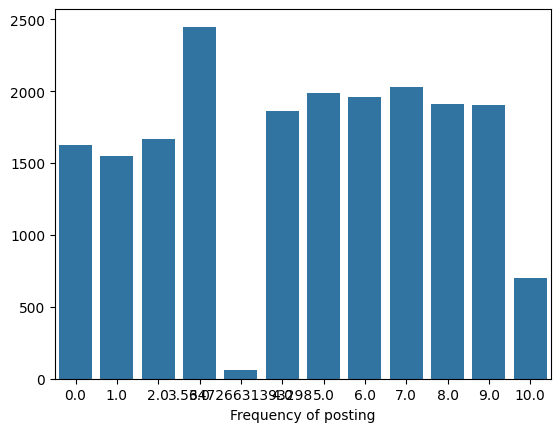

In [26]:
sns.countplot(data=data, x="Post_frequency")
plt.xlabel('Frequency of posting')
plt.ylabel('')
plt.show()

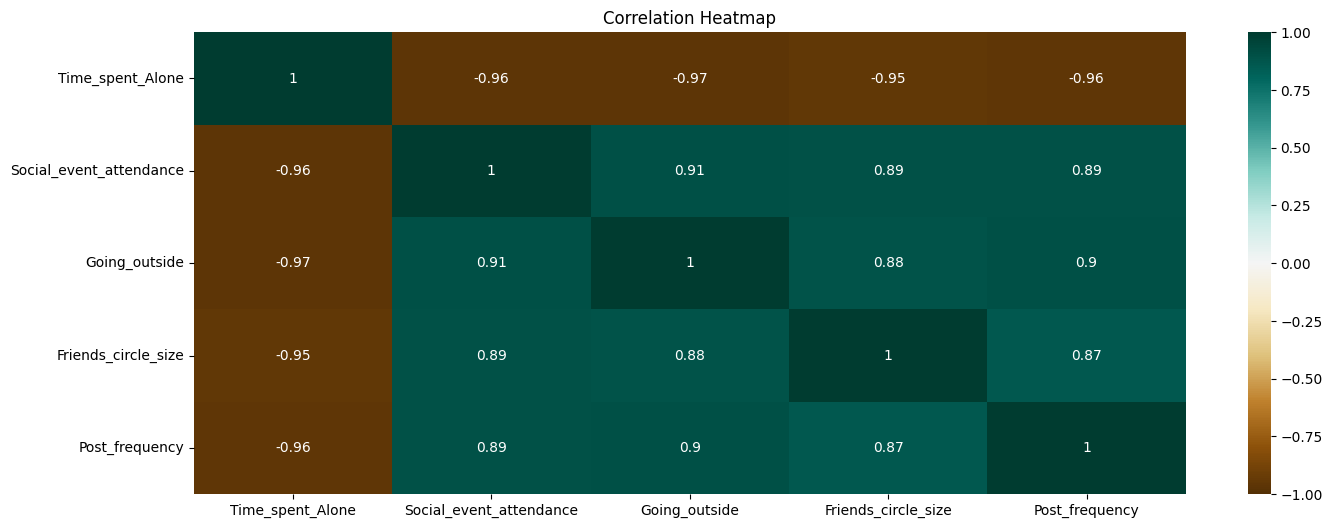

In [27]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

# Data preprocessing

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, TargetEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle

In [100]:
X = data.drop('Personality', axis=1)
y = data['Personality']

In [101]:
X, y = shuffle(X, y, random_state=42)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [177]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y = None):
      return self

    def transform(self, X):

        X['Social_score'] = X['Social_event_attendance'] + X['Going_outside'] + X['Friends_circle_size']
        X['Introvert_score'] = X['Time_spent_Alone'] - X['Social_score']
        X['Alone_to_friends_ratio'] = X['Time_spent_Alone'] / (X['Friends_circle_size'] + 1)
        X['Social_post_interaction'] = X['Post_frequency'] * X['Social_event_attendance']

        return X

In [166]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', add_indicator=True))
])

In [167]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('encoder', OrdinalEncoder())
])

In [168]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

In [169]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

# Model building

In [170]:
! pip install catboost

In [171]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.ensemble import StackingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold

In [178]:
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

In [179]:
params_xgb = {
    "objective" : "binary:logistic",
    "eval_metric" : "logloss",
    'n_estimators' : 1000,
    'learning_rate': 0.01,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'scale_pos_weight': scale_pos_weight
}

In [180]:
xgb_pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(**params_xgb))
])

In [181]:
params_cat = {
    'learning_rate': 0.01,
    'depth': 7,
    'l2_leaf_reg': 1.0,
    'random_seed': 42,
    'subsample': 0.8,
    'colsample_bylevel': 0.8,
    'iterations': 1000,
    'scale_pos_weight': scale_pos_weight
}

In [182]:
cat_pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor),
    ('classifier', CatBoostClassifier(**params_cat))
])

In [183]:
params_lgbm = {
    'learning_rate': 0.01,
    'num_leaves': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_estimators': 1000,
    'scale_pos_weight': scale_pos_weight
}

In [184]:
lgbm_pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor),
    ('classifier', LGBMClassifier(**params_lgbm))
])

In [185]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [186]:
# final_estimator = Pipeline([
#     ('preprocessor', preprocessor),
#     ('ridge', RidgeClassifierCV())
# ])

In [187]:
# base_models = [
#     ('xgb', xgb_pipeline),
#     ('cat', cat_pipeline),
#     ('lgbm', lgbm_pipeline)
# ]

# stacked_model = StackingClassifier(
#     estimators=base_models,
#     final_estimator=LogisticRegressionCV(),
#     cv=cv,
#     passthrough=False
# )

In [188]:
stacked_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_pipeline),
        ('cat', cat_pipeline),
        ('lgbm', lgbm_pipeline)
    ],
    voting='soft',
    weights=[3, 1, 2]
)

# scores = cross_val_score(stacked_model, X, y, cv=5, scoring='accuracy')
# print("CV accuracy: ", scores.mean())

In [189]:
stacked_model.fit(X_train, y_train)

0:	learn: 0.6790576	total: 5.96ms	remaining: 5.96s
1:	learn: 0.6651267	total: 14.8ms	remaining: 7.39s
2:	learn: 0.6514172	total: 23.4ms	remaining: 7.78s
3:	learn: 0.6383206	total: 32.5ms	remaining: 8.09s
4:	learn: 0.6251998	total: 40.6ms	remaining: 8.08s
5:	learn: 0.6125476	total: 49ms	remaining: 8.12s
6:	learn: 0.6001091	total: 57.1ms	remaining: 8.1s
7:	learn: 0.5881445	total: 66.3ms	remaining: 8.23s
8:	learn: 0.5766583	total: 74.8ms	remaining: 8.24s
9:	learn: 0.5654858	total: 83.6ms	remaining: 8.28s
10:	learn: 0.5544884	total: 92.3ms	remaining: 8.3s
11:	learn: 0.5437919	total: 101ms	remaining: 8.28s
12:	learn: 0.5335242	total: 109ms	remaining: 8.24s
13:	learn: 0.5237701	total: 117ms	remaining: 8.21s
14:	learn: 0.5139858	total: 124ms	remaining: 8.17s
15:	learn: 0.5044098	total: 132ms	remaining: 8.14s
16:	learn: 0.4951700	total: 141ms	remaining: 8.13s
17:	learn: 0.4864694	total: 149ms	remaining: 8.12s
18:	learn: 0.4779388	total: 154ms	remaining: 7.97s
19:	learn: 0.4695863	total: 163ms	

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('features', FeatureEngineer()),
                                              ('preprocessing',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=True))]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7d3104533950>),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(add_indicator=Tru...
                                                                                                               strategy='most_frequent')),
                                                                                                ('encoder',
                                                                                                 OrdinalEncoder())]),
                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7d31045f4510>)])),
                                              ('classifier',
                                               LGBMClassifier(colsample_bytree=0.8,
                                                              learning_rate=0.01,
                                                              n_estimators=1000,
                                                              num_leaves=100,
                                                              random_state=42,
                                                              reg_alpha=0.1,
                                                              reg_lambda=1.0,
                                                              scale_pos_weight=2.5470501163036583,
                                                              subsample=0.8))]))],
                 voting='soft', weights=[3, 1, 2])

In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [191]:
val_probs = stacked_model.predict_proba(X_val)[:, 1]

best_threshold = 0.5
best_acc = 0

# Try thresholds from 0.4 to 0.59 (step 0.01)
for threshold in np.arange(0.4, 0.8, 0.01):
    preds = (val_probs >= threshold).astype(int)
    acc = accuracy_score(y_val, preds)
    if acc > best_acc:
        best_acc = acc
        best_threshold = threshold

print(f"Best threshold: {best_threshold:.2f} with accuracy: {best_acc:.4f}")

Best threshold: 0.43 with accuracy: 0.9676


In [192]:
val_probs = stacked_model.predict_proba(X_val)[:, 1]
val_preds = (val_probs >= best_threshold).astype(int)

In [193]:
acc = accuracy_score(y_val, val_preds)
print("Accuracy for test set {} %".format(acc*100))

Accuracy for test set 96.75727229375298 %


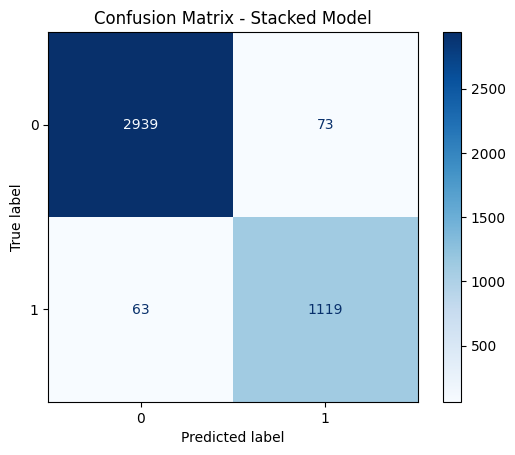

In [194]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, val_preds))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Stacked Model")
plt.show()

# Submition

In [195]:
y_pred_test = stacked_model.predict(test_data)

In [196]:
test_probs = stacked_model.predict_proba(test_data)[:, 1]

y_pred_test = (test_probs >= best_threshold).astype(int)

In [197]:
mapping = {0: "Extrovert", 1: "Introvert"}

y_test_labels = pd.Series(y_pred_test).map(mapping)

In [198]:
submission = pd.DataFrame({
    'id': test_data["id"],
    'Personality': y_test_labels
})

In [199]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [201]:
submission.to_csv('submission.csv', index=False)